In [1]:
import numpy as np
import pandas as pd
import math
import cPickle as pickle

In [2]:
file = '/Users/JH/Desktop/NTU/NTU_Research/data/NEM_Load_Forecasting_Database.xls'

QLD = 'Actual_Data_QLD'
NSW = 'Actual_Data_NSW'
VIC = 'Actual_Data_VIC'
SA = 'Actual_Data_SA'
TAS = 'Actual_Data_TAS'

In [3]:
# Set Classes as Data Container

class Structure:
    def __init__(self):
        self._feature = []
        self._target = []

    @property
    def feature(self):
        return self._feature

    @property
    def target(self):
        return self._target

    @feature.setter
    def feature(self, value):
        self._feature = value

    @target.setter
    def target(self, value):
        self._target = value


class Data:
    def __init__(self):
        pass

    class Train(Structure):
        def __init__(self):
            pass

    class Test(Structure):
        def __init__(self):
            pass


class DataSet:
    def __init__(self):
        pass

    class Raw:
        def __init__(self):
            pass

        class Train(Structure):
            def __init__(self):
                pass

        class Test(Structure):
            def __init__(self):
                pass

    class PreProcessed:
        def __init__(self):
            pass

        class Train(Structure):
            def __init__(self):
                pass

        class Test(Structure):
            def __init__(self):
                pass

In [4]:
# Set Functions

def normalization(data):
    return (data - min(data)) / (max(data) - min(data))


def data_splitter(data, ratio=0.8):
    """
    split data into training data & testing data
    :param data:

    :param ratio:
        training data ratio
    :return:
        train_data, test_data
    """
    splitter = int(len(data) * ratio)
    return np.array(data[:splitter]), np.array(data[splitter + 1:])


def preprocessing_filter(data, nominator, denominator):
    return normalization(data) ** (nominator / denominator)


def preprocessing(data_present, temperature_max, temperature_mean, denominator):
    data_present = list(data_present) + list(
        preprocessing_filter(np.array(data_present), temperature_max, denominator)) + list(
        preprocessing_filter(np.array(data_present), temperature_mean, denominator))

    return np.array(data_present)


def data_alloter(df):
    dataset = DataSet()
    denominator = df['Mean Tem.'].min()

    raw_feature = []
    raw_target = []
    preprocessed_feature = []
    preprocessed_target = []

    for row in range(0, len(df)):
        # if both MaxTemp and MeanTemp are not nan
        if not math.isnan(df['Max Tem.'][row]) and not math.isnan(df['Mean Tem.'][row]):
            if not math.isnan(df['Max Tem.'][row + 1]) and not math.isnan(df['Mean Tem.'][row + 1]):
                # Raw
                powerload_present = np.array(df.loc[row][5:53])
                powerload_future = np.array(df.loc[row + 1][5:53])

                raw_feature.append(np.array(
                    list(powerload_present) + list([df['Max Tem.'][row + 1]]) + list([df['Mean Tem.'][row + 1]])))
                raw_target.append(np.array(powerload_future))
                
                #Preprocessed
                powerload_present = normalization(np.array(df.loc[row][5:53]))
                powerload_future = normalization(np.array(df.loc[row + 1][5:53]))
                
                preprocessed_powerload_present = preprocessing(powerload_present,
                                                               df['Max Tem.'][row + 1],
                                                               df['Mean Tem.'][row + 1],
                                                               denominator)

                preprocessed_feature.append(preprocessed_powerload_present)
                preprocessed_target.append(np.array(powerload_future))
    
    # Raw
    dataset.Raw.Train.feature, dataset.Raw.Test.feature = data_splitter(raw_feature)
    dataset.Raw.Train.target, dataset.Raw.Test.target = data_splitter(raw_target)
    
    #Preprocessed
    dataset.PreProcessed.Train.feature, dataset.PreProcessed.Test.feature = data_splitter(preprocessed_feature)
    dataset.PreProcessed.Train.target, dataset.PreProcessed.Test.target = data_splitter(preprocessed_target)

    return dataset

In [5]:
df = pd.read_excel(file, sheetname=QLD)
dataset = data_alloter(df)

In [6]:
dataset.Raw.Train.feature[0]

array([ 5473.7,  5283.8,  5171.6,  4996.9,  4794. ,  4677.3,  4605.8,
        4600.2,  4572.4,  4608.7,  4708. ,  4972.1,  5249.6,  5658.7,
        6025.5,  6386.5,  6535.9,  6594.5,  6585.5,  6575.2,  6510.3,
        6475.4,  6426.5,  6359. ,  6305.3,  6295. ,  6281.3,  6279.5,
        6301.8,  6266.8,  6264.3,  6306.1,  6310.2,  6291.3,  6336. ,
        6488.2,  6736.6,  6642.1,  6616.1,  6554.4,  6479.9,  6443.2,
        6248.3,  6136.5,  5967.4,  5843.7,  5675. ,  5556.7,    22.9,
          19.3])

In [7]:
dataset.PreProcessed.Train.feature[0]

array([  4.16458738e-01,   3.28712688e-01,   2.76869051e-01,
         1.96146382e-01,   1.02393494e-01,   4.84705665e-02,
         1.54329544e-02,   1.28453932e-02,   0.00000000e+00,
         1.67729415e-02,   6.26559468e-02,   1.84687182e-01,
         3.12910082e-01,   5.01940671e-01,   6.71425931e-01,
         8.38231217e-01,   9.07263654e-01,   9.34340634e-01,
         9.30182053e-01,   9.25422789e-01,   8.95434803e-01,
         8.79308752e-01,   8.56713797e-01,   8.25524443e-01,
         8.00711579e-01,   7.95952315e-01,   7.89622031e-01,
         7.88790315e-01,   7.99094354e-01,   7.82922096e-01,
         7.81766935e-01,   8.01081231e-01,   8.02975695e-01,
         7.94242676e-01,   8.14896960e-01,   8.85223177e-01,
         1.00000000e+00,   9.56334904e-01,   9.44321227e-01,
         9.15811847e-01,   8.81388042e-01,   8.64430274e-01,
         7.74373903e-01,   7.22715091e-01,   6.44579983e-01,
         5.87422604e-01,   5.09472322e-01,   4.54810091e-01,
         2.11186686e-01,

In [6]:
import tensorflow as tf

In [7]:
batch_size = 50
num_steps = 5000
data_showing_step = 100

# Network Parameters
n_input = 144  # feature data as input (input matrix shape: ???)
n_output = 48  # target data as output  (48-points)

In [8]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input], name='feature_input')
y = tf.placeholder(tf.float32, [None, n_output], name='target_output')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')  # dropout (keep probability)
learning_rate_decayed = tf.placeholder(tf.float32, shape=[])

In [9]:
# Create model
def deep_net(x, weights, biases, dropout):
    with tf.name_scope('hidden_layer_1') as hd_layer_1:
        hd1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
        hd1 = tf.nn.relu(hd1)
        # Apply Dropout
        hd1 = tf.nn.dropout(hd1, dropout)
       
    with tf.name_scope('hidden_layer_2') as hd_layer_2:
        hd2 = tf.add(tf.matmul(hd1, weights['w2']), biases['b2'])
        hd2 = tf.nn.relu(hd2)
        # Apply Dropout
        hd2 = tf.nn.dropout(hd2, dropout)
        """
    with tf.name_scope('hidden_layer_3') as hd_layer_3:
        hd3 = tf.add(tf.matmul(hd2, weights['w3']), biases['b3'])
        hd3 = tf.nn.relu(hd3)
        # Apply Dropout
        hd3 = tf.nn.dropout(hd3, dropout)
        
    with tf.name_scope('hidden_layer_4') as hd_layer_4:
        hd4 = tf.add(tf.matmul(hd3, weights['w4']), biases['b4'])
        hd4 = tf.nn.relu(hd4)
        # Apply Dropout
        hd4 = tf.nn.dropout(hd4, dropout)
        
    with tf.name_scope('hidden_layer_5') as hd_layer_5:
        hd5 = tf.add(tf.matmul(hd4, weights['w5']), biases['b5'])
        hd5 = tf.nn.relu(hd5)
        # Apply Dropout
        hd1 = tf.nn.dropout(hd1, dropout)
        """
    with tf.name_scope('output_layer') as output_layer:
        out = tf.add(tf.matmul(hd2, weights['out']), biases['out'])
        
    return out     

In [10]:
# Store layers weight & bias
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input,n_input]), name='w1'),
    'w2': tf.Variable(tf.truncated_normal([n_input,n_input]), name='w2'),
    'w3': tf.Variable(tf.truncated_normal([n_input,n_input]), name='w3'),
    'w4': tf.Variable(tf.truncated_normal([n_input,n_input]), name='w4'),
    'w5': tf.Variable(tf.truncated_normal([n_input,n_input]), name='w5'),
    'out': tf.Variable(tf.truncated_normal([n_input, n_output]), name='wo')
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_input]), name='b1'),
    'b2': tf.Variable(tf.truncated_normal([n_input]), name='b2'),
    'b3': tf.Variable(tf.truncated_normal([n_input]), name='b3'),
    'b4': tf.Variable(tf.truncated_normal([n_input]), name='b4'),
    'b5': tf.Variable(tf.truncated_normal([n_input]), name='b5'),
    'out': tf.Variable(tf.truncated_normal([n_output]), name='bo')
}

In [11]:
# Construct model
pred = deep_net(x, weights, biases, keep_prob)

In [12]:
# Define loss and optimizer
with tf.name_scope('cost'):
    #cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=y))
    #cost = tf.reduce_sum(tf.pow(pred-y, 2))/(2*n_output)
    cost = tf.reduce_mean(tf.square(pred-y))
    tf.summary.scalar('cost/', cost)
with tf.name_scope('optimization'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_decayed).minimize(cost)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate_decayed).minimize(cost)

# Evaluation model
with tf.name_scope('evaluation'):
    rmse = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y, pred))))

# Initializing the variables
init = tf.global_variables_initializer()

In [13]:
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)

# Training cycle
for step in range(num_steps):
    
    avg_cost = 0.
    total_batch = int(dataset.PreProcessed.Train.feature.shape[0]/batch_size)
    
    if 500 < step < 2000:
        learning_rate = 0.01 / 100
    elif 2000 <= step < 10000:
        learning_rate = 0.01 / 10000
    else:
        learning_rate = 0.01

    # set a offset
    offset = (step * batch_size) % (dataset.PreProcessed.Train.target.shape[0] - batch_size)
    
    # Generate a minibatch.
    batch_x = dataset.PreProcessed.Train.feature[offset:(offset + batch_size), :]
    batch_y = dataset.PreProcessed.Train.target[offset:(offset + batch_size), :]
    
    # Run optimization op (backprop)
    sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, 
                                   keep_prob: 1., 
                                   learning_rate_decayed: learning_rate})
    
    c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, 
                                  keep_prob: 1.})
    
    # Compute average loss
    avg_cost += c / total_batch
    
    if (step % data_showing_step == 0):
        print "step:", '%04d' % (step), "cost=", "{:.9f}".format(avg_cost)
        
print "Optimization Finished!"

print "Training Accuracy [RMSE] :",\
    sess.run(rmse, feed_dict={x: dataset.PreProcessed.Train.feature, 
                              y: dataset.PreProcessed.Train.target,
                              keep_prob: 1.})

step: 0000 cost= 7672.221354167
step: 0100 cost= 25.867121379
step: 0200 cost= 17.217597961
step: 0300 cost= 7.620015462
step: 0400 cost= 7.553839366
step: 0500 cost= 8.673494339
step: 0600 cost= 7.706714630
step: 0700 cost= 5.616436640
step: 0800 cost= 6.155270894
step: 0900 cost= 5.934222539
step: 1000 cost= 6.485733032
step: 1100 cost= 5.586313248
step: 1200 cost= 5.715907415
step: 1300 cost= 5.522451401
step: 1400 cost= 6.116048177
step: 1500 cost= 5.930681229
step: 1600 cost= 5.383005142
step: 1700 cost= 5.032297134
step: 1800 cost= 5.259486834
step: 1900 cost= 6.425180435
step: 2000 cost= 5.079426130
step: 2100 cost= 5.129959424
step: 2200 cost= 5.454413096
step: 2300 cost= 6.616913478
step: 2400 cost= 4.611794154
step: 2500 cost= 5.364889145
step: 2600 cost= 5.615975698
step: 2700 cost= 6.847210566
step: 2800 cost= 4.470604261
step: 2900 cost= 5.786731084
step: 3000 cost= 6.030968984
step: 3100 cost= 6.857404709
step: 3200 cost= 4.627347946
step: 3300 cost= 5.642361323
step: 340

In [14]:
print "Testing Accuracy [RMSE] :",\
    sess.run(rmse, feed_dict={x: dataset.PreProcessed.Test.feature, 
                              y: dataset.PreProcessed.Test.target, 
                              keep_prob: 1.})

Testing Accuracy [RMSE] : 5.86324


In [15]:
predict = sess.run(pred, feed_dict={x: dataset.PreProcessed.Test.feature,
                                    y: dataset.PreProcessed.Test.target, 
                                    keep_prob: 1.})

In [16]:
print predict[11]

[ 13.08517361  12.46460915   9.28761482   5.40493536   2.55628371
  -6.5990181    3.85750246   3.64690924   2.18180561  -3.12137222
  -3.54125166  -2.75895047   1.91473031  -3.35167313   3.74286556
   5.04492474   0.14847809   4.72641993  -0.39123285  -0.54086268
  13.08466053   8.17261314  -2.50090981   6.79185009   0.04213095
  -1.46180773  -3.10520434   4.07175064   0.1257444    9.66297817
   4.26318884  -8.17341709  -0.83490217   6.16789436  -0.28347754
   2.0138483   -4.35503387  -3.20211506  -2.99450731  -3.6774559
   2.43344378  -2.54009962   9.31307316   6.28572321 -10.44181824
   0.05820376   2.91421747   3.98430204]


In [17]:
print dataset.PreProcessed.Test.target[11]

[0.39805697781278704 0.28611439324318383 0.22244103102708826
 0.14778346680670426 0.089624086473239384 0.040042011290534342
 0.019211413067261672 0.0 0.010940440243315393 0.030195615071550486
 0.077458316922672993 0.19005732790687471 0.32746925736291604
 0.52465975230843287 0.74841363616471934 0.93278193514507046 1.0
 0.96849153209925165 0.90678744912695286 0.89729114699575518
 0.85939346199291045 0.82031420944378819 0.80101527285457974
 0.77965953349962802 0.7621110673493503 0.75191457704258025
 0.74745087742330774 0.69848146689422774 0.68999168526541521
 0.68242090061704086 0.67576911294910513 0.66404096100827092
 0.65375694717955446 0.72246291190757517 0.78898078858693277
 0.90578092862456772 0.99186031245897355 0.97278018467463134
 0.9569821889632838 0.90004813793707072 0.9035053170539582
 0.89750995580062143 0.82486543258500722 0.76377401426633396
 0.68863507067524388 0.60618791300161923 0.56054439630650732
 0.52190276136711733]


In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

/Users/JH/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<IPython.core.display.Javascript object>


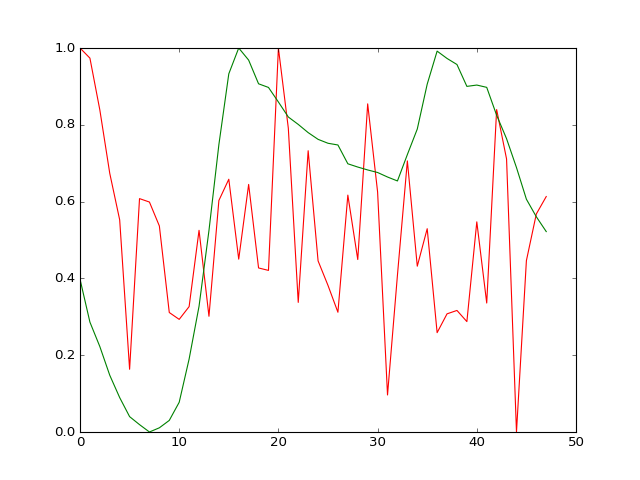

In [19]:
time = np.arange(0, 48, 1)
plt.plot(time, normalization(predict[11]), 'r', 
         time, dataset.PreProcessed.Test.target[11], 'g')
plt.show()